In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import geopandas as gp
import os
import json
import urllib.request as urllib
import statsmodels.formula.api as smf 


In [2]:
api = 'https://data.cityofnewyork.us/resource/m46j-75iy.json'
data = json.loads(urllib.urlopen(api).read())
type(data)

list

In [3]:
nrg = gp.GeoDataFrame(data)

In [4]:
print(type(nrg), nrg.shape)

<class 'geopandas.geodataframe.GeoDataFrame'> (1000, 32)


In [5]:
nrg.head()

,automatic_water_benchmarking_eligible,bbls_co_reported,bin,borough,census_tract,co_reported_bbl_status,community_board,community_council,direct_ghg_emissions_mtco2e,dof_benchmarking_submission_status,...,reported_property_floor_area_building_s_ft,reported_water_method,site_eui_kbtu_ft2,source_eui_kbtu_ft2,street_name,street_number,total_ghg_emissions_mtco2e,weather_normalized_site_eui_kbtu_ft2,weather_normalized_source_eui_kbtu_ft2,zip_code
0,N/A,1000410001,NaN,Manhattan,NaN,NaN,NaN,NaN,NaN,BBL not valid,...,918919,N/A,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN
1,Yes,NaN,NaN,Queens,NaN,NaN,NaN,NaN,NaN,No Submission Matched to BBL,...,#N/A,None,NaN,NaN,108 STREET,63-10,NaN,NaN,NaN,11375
2,N/A,2027620097,NaN,Bronx,NaN,NaN,NaN,NaN,NaN,BBL not valid,...,64200,N/A,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN
3,No,NaN,1012266,Manhattan,99,NaN,4,3,NaN,No Submission Matched to BBL,...,#N/A,None,NaN,NaN,11 AVENUE,201,NaN,NaN,NaN,10001
4,N/A,2048300034,NaN,Bronx,NaN,NaN,NaN,NaN,NaN,Not on Covered Buildings List,...,50000,None,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN


In [6]:
nrg.columns

Index(['automatic_water_benchmarking_eligible', 'bbls_co_reported', 'bin',
       'borough', 'census_tract', 'co_reported_bbl_status', 'community_board',
       'community_council', 'direct_ghg_emissions_mtco2e',
       'dof_benchmarking_submission_status', 'dof_number_of_buildings',
       'dof_property_floor_area_buildngs_and_parking_ft2', 'energy_star_score',
       'indirect_ghg_emissions_mtco2e', 'latitude', 'longitude',
       'municipally_supplied_potable_water_indoor_intensity_gal_ft', 'nta',
       'nyc_borough_block_and_lot_bbl', 'primary_property_type_self_selected',
       'record_number', 'reported_nyc_building_identificaiton_numbers_bins',
       'reported_property_floor_area_building_s_ft', 'reported_water_method',
       'site_eui_kbtu_ft2', 'source_eui_kbtu_ft2', 'street_name',
       'street_number', 'total_ghg_emissions_mtco2e',
       'weather_normalized_site_eui_kbtu_ft2',
       'weather_normalized_source_eui_kbtu_ft2', 'zip_code'],
      dtype='object')

In [7]:
mhp = gp.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/Manhattan/MNMapPLUTO.shp")

In [8]:
print(type(mhp), mhp.shape)

<class 'geopandas.geodataframe.GeoDataFrame'> (42686, 88)


In [9]:
mhp.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area,geometry
0,MN,1,201,101,1,1000,02,1,10004,E007,...,10101,,0.000000e+00,,1,16V2,0,6306.265838,1.148541e+06,"POLYGON ((973154.7117999941 194614.3315999955,..."
1,MN,9,14,101,9,1013,02,1,10004,L015,...,10101,,1.000090e+09,12/26/1985,1,16V2,0,686.230174,2.373306e+04,"POLYGON ((980492.3622000068 195423.9451999962,..."
2,MN,15,7501,101,13,2005,02,1,10004,E010,...,10101,,1.000150e+09,12/29/1998,1,16V2,7,1098.925676,6.753824e+04,"POLYGON ((979999.0820000023 196493.2800000012,..."
3,MN,13,5,101,13,2008,02,1,10004,E010,...,10101,,0.000000e+00,,1,16V2,0,709.632239,3.068607e+04,"POLYGON ((980424.4003999978 196274.334800005, ..."
4,MN,1,10,101,5,1018,02,1,10004,E007,...,10101,,0.000000e+00,,1,16V2,0,12277.830569,7.550344e+06,"POLYGON ((979561.8711999953 191884.2495999932,..."


In [10]:
mhp.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthArea',
       'SanitBoro', 'SanitDistr', 'SanitSub', 'Address', 'ZoneDist1',
       'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2',
       'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone', 'BldgClass',
       'LandUse', 'Easements', 'OwnerType', 'OwnerName', 'LotArea', 'BldgArea',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource', 'NumBldgs',
       'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront', 'LotDepth',
       'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode', 'LotType',
       'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand', 'ExemptTot',
       'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist', 'Landmark',
       'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode', 'BBL',
       'CondoNo', 'Tract2010', 'XCoord', 'YCoord'

### explore the column names
EUI means energy use intensity, site energy and source energy see:https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/understand-metrics/difference

kbtu = Kilo British Thermal Unit

ft2 = square feet

## Based on the common sense and the research target, select the columns we want:
- Common column: BBL
- Energy (per ft2)
- Area (ft2)
- Units

In [11]:
# choose the site energy
nrg1 = nrg[['nyc_borough_block_and_lot_bbl', 'dof_property_floor_area_buildngs_and_parking_ft2',
          'site_eui_kbtu_ft2', 'energy_star_score']]
mhp1 = mhp[['UnitsTotal', 'UnitsRes', 'BBL', 'YearBuilt', 'LotArea']]

In [12]:
nrg1.is_copy = False
nrg1.rename(columns = {'nyc_borough_block_and_lot_bbl':'BBL', 
                      'dof_property_floor_area_buildngs_and_parking_ft2':'area_ft2'}, inplace = True)

#### explore and clean nrg1 data table

In [13]:
nrg1.head()

,BBL,area_ft2,site_eui_kbtu_ft2,energy_star_score
0,1000410001,NaN,NaN,Not Available
1,4021460028,82730,NaN,NaN
2,2027620097,NaN,NaN,Not Available
3,1006700001,440360,NaN,NaN
4,2048300034,NaN,NaN,Not Available


In [14]:
nrg1.describe()

,BBL,area_ft2,site_eui_kbtu_ft2,energy_star_score
count,997,879,840,969
unique,973,841,617,79
top,1005800001,70000,See Primary BBL,Not Available
freq,2,3,16,654


In [15]:
## delete the useless data of site_eui
## delete na values
nrg1 = nrg1[nrg1['site_eui_kbtu_ft2'] != 'See Primary BBL']
nrg1 = nrg1.dropna()

## after delete rows, index needs reset
nrg1.reset_index(drop = True, inplace = True)
nrg1.head()

,BBL,area_ft2,site_eui_kbtu_ft2,energy_star_score
0,1013110040,313200,125.4,68
1,4002520018,184400,46,100
2,1007660061,53168,122.3,4
3,1008150046,364000,117,52
4,1005050001,214110,82.1,44


In [16]:
nrg1.shape

(746, 4)

In [17]:
# explore mhp1 data table
# results shows that all columns data is numeric
mhp1.describe()

,UnitsTotal,UnitsRes,BBL,YearBuilt,LotArea
count,42686.000000,42686.000000,4.268600e+04,42686.000000,4.268600e+04
mean,24.489903,21.628895,1.012295e+09,1814.429626,1.105831e+04
std,92.654779,89.318941,6.104002e+06,440.431674,2.114766e+05
min,0.000000,0.000000,1.000010e+09,0.000000,0.000000e+00
25%,2.000000,1.000000,1.007000e+09,1900.000000,1.916000e+03
50%,8.000000,6.000000,1.012510e+09,1910.000000,2.523000e+03
75%,20.000000,18.000000,1.017560e+09,1925.000000,5.688500e+03
max,8805.000000,8759.000000,1.022552e+09,2040.000000,3.659000e+07


### Merge two datatables

In [18]:
m = pd.merge(nrg1, mhp1, how = 'inner' )
m.head()

,BBL,area_ft2,site_eui_kbtu_ft2,energy_star_score,UnitsTotal,UnitsRes,YearBuilt,LotArea


In [19]:
## they can't be merged, the reason may be the difference of data type
## check it
print(type(nrg1.BBL[0]), type(mhp1.BBL[0]))

<class 'str'> <class 'numpy.float64'>


In [20]:
## we need to change the string columns into float columns

nrg1.loc[:,['BBL', 'area_ft2',
            'site_eui_kbtu_ft2']] = nrg1.loc[:,['BBL', 'area_ft2', 
                                                'site_eui_kbtu_ft2']].astype(float).astype(int)

# we could also use: pd.to_numeric(df2['BBL'], errors = 'coerce')
# but it cannot used in several columns one time

for i in nrg1.iloc[1,:]:
    print(type(i))

<class 'int'>
<class 'int'>
<class 'int'>
<class 'str'>


In [21]:
## merge again
m = pd.merge(nrg1, mhp1, how = 'inner')
m.head()

,BBL,area_ft2,site_eui_kbtu_ft2,energy_star_score,UnitsTotal,UnitsRes,YearBuilt,LotArea
0,1013110040,313200,125,68,56,0,1977,12185
1,1007660061,53168,122,4,8,0,1912,6300
2,1008150046,364000,117,52,24,0,1954,16647
3,1005050001,214110,82,44,24,0,1926,26860
4,1021420100,64816,137,Not Available,62,54,1924,13822


In [22]:
m.shape

(688, 8)

In [23]:
m.describe()

,UnitsTotal,UnitsRes,YearBuilt,LotArea
count,688.000000,688.000000,688.000000,688.000000
mean,77.851744,64.281977,1931.595930,20198.779070
std,109.707437,110.551820,79.063493,25510.040675
min,0.000000,0.000000,0.000000,3703.000000
25%,11.750000,0.000000,1915.000000,9056.000000
50%,36.000000,11.000000,1927.000000,12775.000000
75%,97.000000,82.250000,1956.000000,21289.000000
max,842.000000,839.000000,2012.000000,298550.000000


In [24]:
## energy star score, lot area are interesting, but we don't need them this time
m1 = m.drop(['energy_star_score', 'LotArea'], axis = 1)
m1.head()

,BBL,area_ft2,site_eui_kbtu_ft2,UnitsTotal,UnitsRes,YearBuilt
0,1013110040,313200,125,56,0,1977
1,1007660061,53168,122,8,0,1912
2,1008150046,364000,117,24,0,1954
3,1005050001,214110,82,24,0,1926
4,1021420100,64816,137,62,54,1924


## Use scatter matrix to see the whole picture

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a6c0828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a8ac908>]], dtype=object)

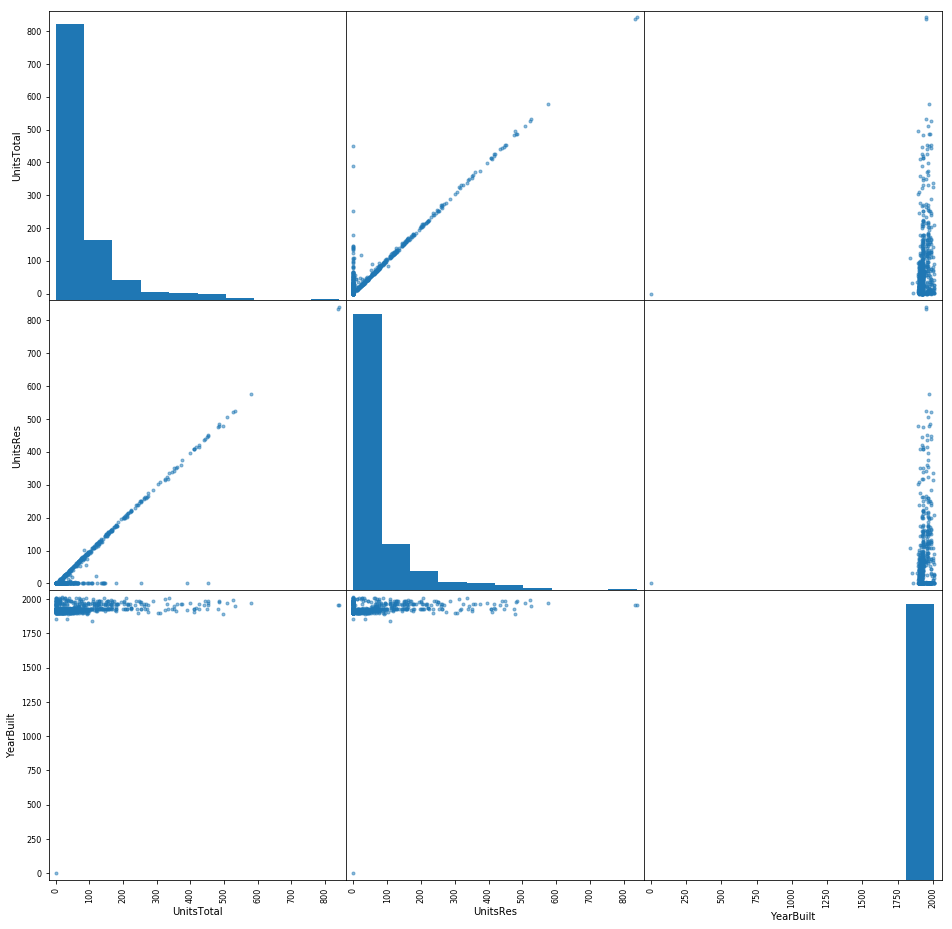

In [25]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(m1, figsize = (16, 16))
## what happen?

### Calculate the total energy consumption of each Building

In [26]:
m1['site_eu_kbtu'] = m1.site_eui_kbtu_ft2 * m1.area_ft2

In [27]:
m1.head()

,BBL,area_ft2,site_eui_kbtu_ft2,UnitsTotal,UnitsRes,YearBuilt,site_eu_kbtu
0,1013110040,313200,125,56,0,1977,39150000
1,1007660061,53168,122,8,0,1912,6486496
2,1008150046,364000,117,24,0,1954,42588000
3,1005050001,214110,82,24,0,1926,17557020
4,1021420100,64816,137,62,54,1924,8879792


## plot the 'Energy Consumption V.S. units.'

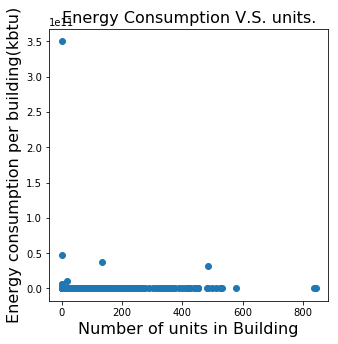

In [28]:
plt.figure(figsize = (5, 5))
plt.scatter(m1.UnitsTotal, m1.site_eu_kbtu)
plt.xlabel('Number of units in Building', fontsize = 16)
plt.ylabel('Energy consumption per building(kbtu)', fontsize = 16)
plt.title('Energy Consumption V.S. units.', fontsize = 16)


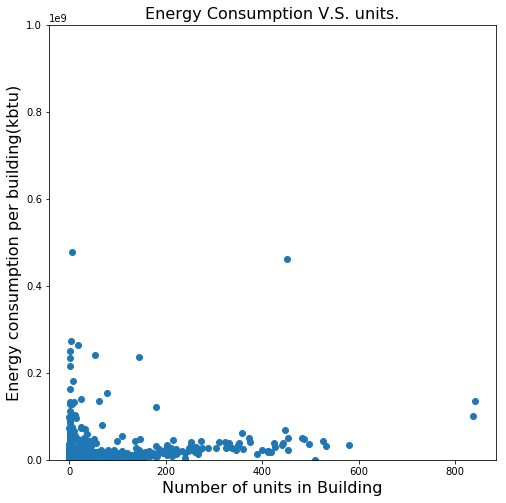

In [29]:
## zoom in on the y axis to 10**9

plt.figure(figsize = (8, 8))
plt.ylim([100, np.power(10, 9)])
plt.scatter(m1.UnitsTotal, m1.site_eu_kbtu)
plt.xlabel('Number of units in Building', fontsize = 16)
plt.ylabel('Energy consumption per building(kbtu)', fontsize = 16)
plt.title('Energy Consumption V.S. units.', fontsize = 16)


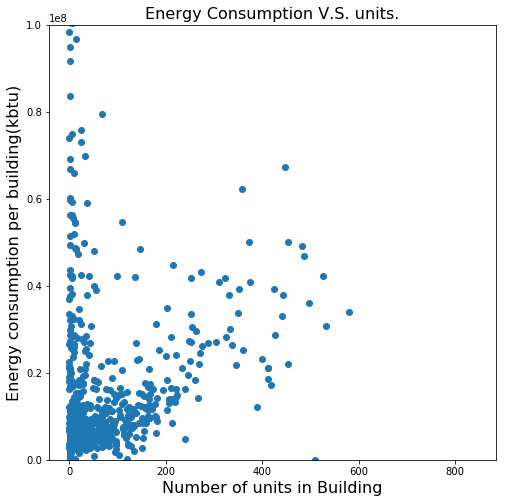

In [30]:
## zoom in more on the y axis to 10**8
## seem better now

plt.figure(figsize = (8, 8))
plt.ylim([100, np.power(10, 8)])
plt.scatter(m1.UnitsTotal, m1.site_eu_kbtu)
plt.xlabel('Number of units in Building', fontsize = 16)
plt.ylabel('Energy consumption per building(kbtu)', fontsize = 16)
plt.title('Energy Consumption V.S. units.', fontsize = 16)

### deeper clean the merged table

In [31]:
# we just need two columns
m2 = m1[['UnitsTotal', 'site_eu_kbtu']]
m2.head()

,UnitsTotal,site_eu_kbtu
0,56,39150000
1,8,6486496
2,24,42588000
3,24,17557020
4,62,8879792


In [32]:
m2.shape

(688, 2)

In [33]:
## exclude the smallest values and largest values
m2 = m2[(m2.UnitsTotal > 10)& (m2.site_eu_kbtu > np.power(10, 5)) & (m2.site_eu_kbtu < np.power(10, 8))]
m2 = m2.dropna()
m2.sort_values(by = 'UnitsTotal', ascending = True, inplace = True)
m2.reset_index(drop = True, inplace = True)
m2.head()


,UnitsTotal,site_eu_kbtu
0,11,5623700
1,11,3439424
2,11,3066624
3,11,101290
4,12,8568000


In [34]:
m2.shape

(504, 2)

## plot log

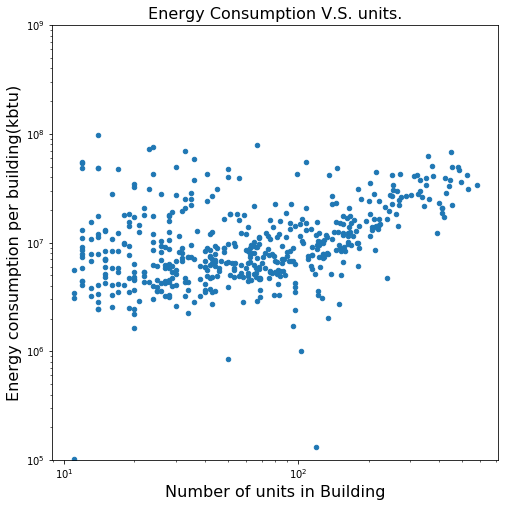

In [35]:

#plt.scatter(m2.UnitsTotal, m2.site_eu_kbtu, loglog=True)

ax = m2.plot(kind = 'scatter', y = 'site_eu_kbtu', x = 'UnitsTotal',  loglog=True, figsize = (8, 8))

ax.set_ylim([np.power(10, 5), np.power(10, 9)])
ax.set_xlabel('Number of units in Building', fontsize = 16)
ax.set_ylabel('Energy consumption per building(kbtu)', fontsize = 16)
ax.set_title('Energy Consumption V.S. units.', fontsize = 16)


### It seems like there is a linear relationship between log(units) and log(energy consumption)

## FIT

### fit energy(y) - units(x) and  units(x) ~ energy(y) 

In [43]:
# renamed as x and y, easy to write the fomular
m2['y'] = np.log10(m2['site_eu_kbtu'].astype(int))
m2['x'] = np.log10(m2['UnitsTotal'])

m2.head()

,UnitsTotal,site_eu_kbtu,y,x
0,11,5623700,6.750022,1.041393
1,11,3439424,6.536486,1.041393
2,11,3066624,6.486661,1.041393
3,11,101290,5.005567,1.041393
4,12,8568000,6.932879,1.079181


In [38]:
lm1 = smf.ols(formula = 'y ~ x', data = m2).fit()
lm2 = smf.ols(formula = 'x ~ y', data = m2).fit()

In [39]:
print(lm1.rsquared, lm2.rsquared)

0.138582188659 0.138582188659


In [40]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     80.76
Date:                Mon, 23 Oct 2017   Prob (F-statistic):           5.18e-18
Time:                        23:37:06   Log-Likelihood:                -173.36
No. Observations:                 504   AIC:                             350.7
Df Residuals:                     502   BIC:                             359.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.3993      0.066     96.726      0.000         6.269     6.529
x              0.3242      0.036      8.987      0.000         0.253     0.395
==============================================================================
Omnibus:                       49.670   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.313
Skew:                          -0.049   Prob(JB):                     9.11e-64
Kurtosis:                       6.717   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 6  +  0.324 * x,     R-squared = 0.138582188659


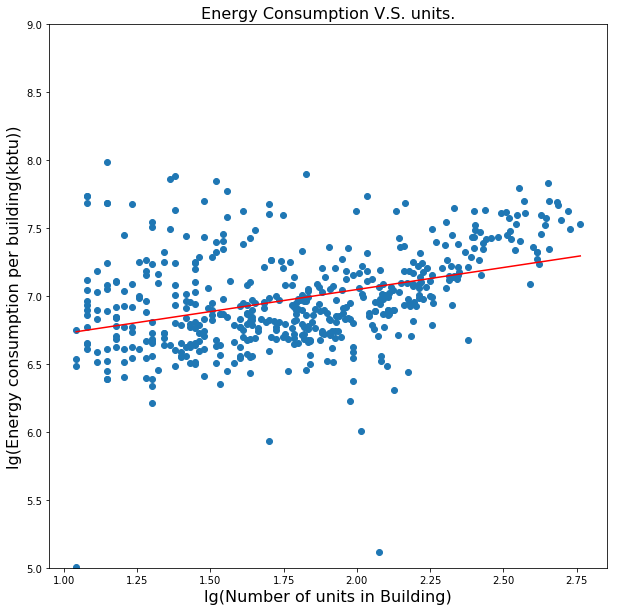

In [45]:
plt.figure(figsize=(10,10))
plt.scatter(m2.x, m2.y)
plt.plot(m2.x, lm1.params[0] + lm1.params[1] * m2.x, c = 'r')

plt.ylim([5, 9])
plt.xlabel('lg(Number of units in Building)', fontsize = 16)
plt.ylabel('lg(Energy consumption per building(kbtu))', fontsize = 16)
plt.title('Energy Consumption V.S. units.', fontsize = 16)

print('y =', int(lm1.params[0]), ' + ', round(lm1.params[1],3),
      '* x,     R-squared =', lm1.rsquared)